## Lab | Cleaning numerical data

Import the necessary libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

In [2]:
pd.set_option('display.max_columns', None)
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

#### First look at its main features (head, shape, info).

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores).

In [6]:
customer_df.columns = [header.lower().replace(' ', '_') for header in list(customer_df.columns)]
customer_df = customer_df.rename(columns = {'employmentstatus': 'employment_status'})
print(customer_df.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


#### Change effective to date column to datetime format.

In [7]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
print(customer_df['effective_to_date'].dtype)

datetime64[ns]


#### Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [8]:
numerical = customer_df.select_dtypes(include='number')
categorical = customer_df.select_dtypes(include=object)

In [9]:
numerical_cols = list(numerical.columns)
print('Header names of numerical before splitting:', 
      numerical_cols)

Header names of numerical before splitting: ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']


In [10]:
def data_dicrete_and_continuous(df):
    discrete_cols = []
    continuous_cols = []
    threshold = df.shape[0]*0.02

    for i in df.columns:
        unique_values = df[i].nunique()
        if unique_values < threshold:
            discrete_cols.append(i)
        else:
            continuous_cols.append(i)

    return discrete_cols, continuous_cols

In [11]:
discrete, continuous = data_dicrete_and_continuous(numerical)
print('Discrete cols', discrete)
print('')
print('Continuous cols', continuous)

Discrete cols ['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']

Continuous cols ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'total_claim_amount']


#### Plot a correlation matrix, comment what you see.

In [12]:
matrix_correlation = numerical.corr()
matrix_correlation

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


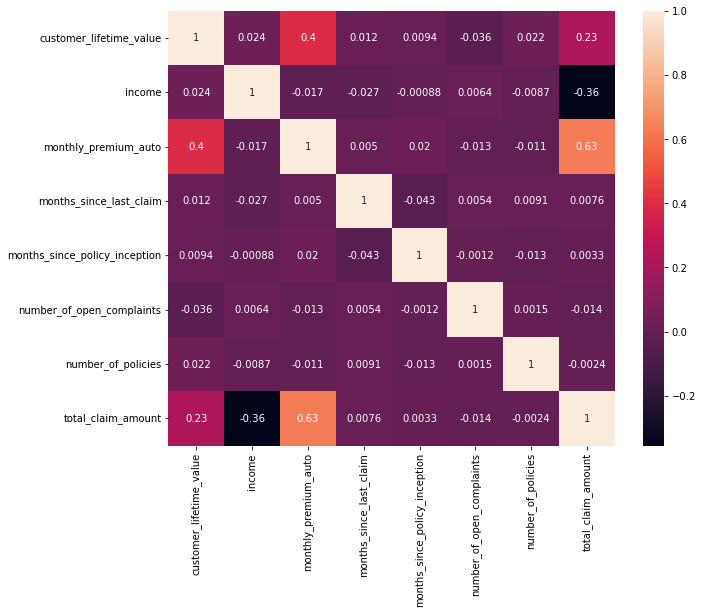

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(matrix_correlation, annot=True)
plt.show()

Comment: All the correlations higher than 0.20 -highlighted on the heatmap above- correspond to two continuous features:

- There's a positive and moderate correlation (0.63) between total_claim_amount and monthly_premium_amount.
- There's also a positive and moderate correlation (0.4) between monthly_premium_auto and customer_lifetime_value.
- Features income and total_claim_amount show a weak and negative correlation (-0.36), while the coefficient between total_claim_amount and customer_lifetime_value indicates a weak -but positive- correlation (0.23).

#### Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

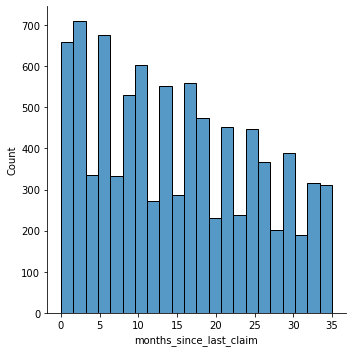

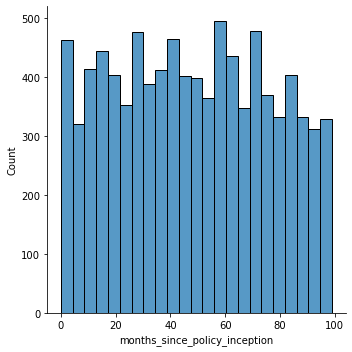

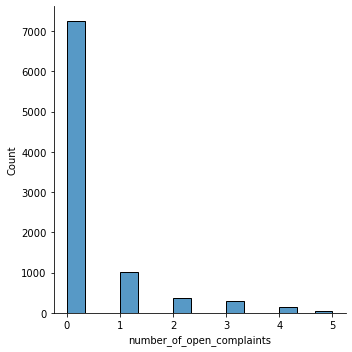

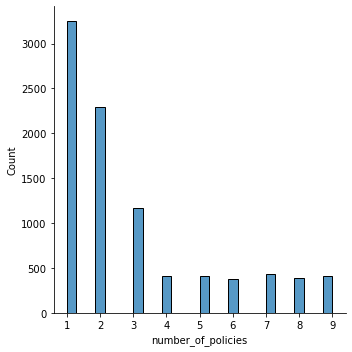

In [14]:
for col in numerical[discrete]:
    sns.displot(numerical[col])
    plt.show()

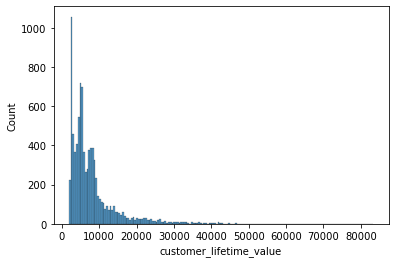

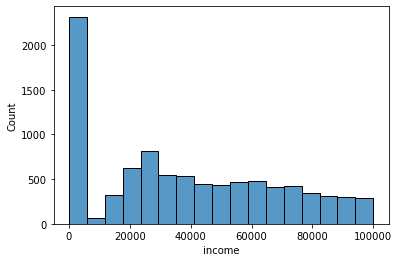

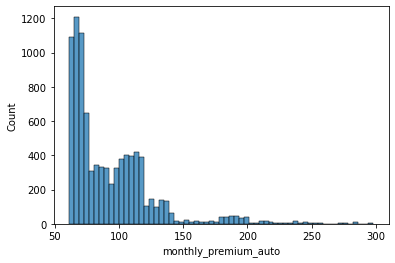

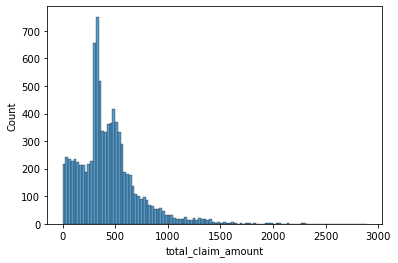

In [15]:
for col in numerical[continuous]:
    sns.histplot(numerical[col])
    plt.show()

The plots for discrete data show that, although the data from these columns are being considered numerical, an option would be to transform them into categorical features.

The plots for continuous columns show data heavily skewed, so it would be wise to look for outliers and decide what to do with tails. Also, it is not efficient to keep these plots if we want to obtain useful information, we could also consider binning the data.

#### Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

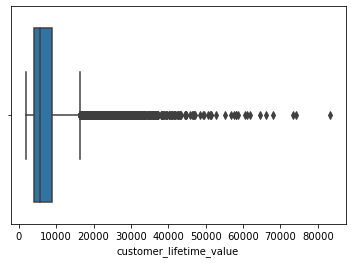

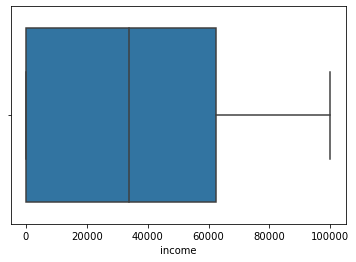

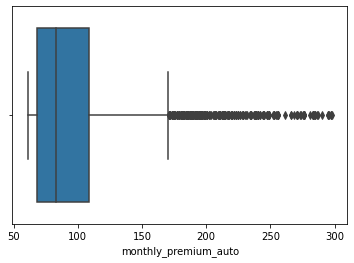

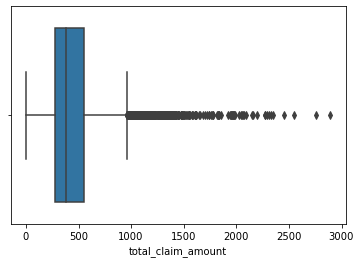

In [16]:
for col in numerical[continuous]:
    sns.boxplot(x = numerical[col])
    plt.show()

Data suggest that columns total_claim_amount and customer_lifetime_value contain outliers. Also, together with monthly_premium_auto, the three columns present long tails.

#### Did you find outliers? Comment what you will do with them.

Yes, I did. First, I am going to identify those outliers and, depending on the number of values, I'll decide later whether I'll drop them.

In [17]:
# How many outliers do our data present?

# TCA
iqr_tca = np.nanpercentile(numerical['total_claim_amount'],75) - np.nanpercentile(numerical['total_claim_amount'],25)
upper_limit_tca = np.nanpercentile(numerical['total_claim_amount'],75) + 1.5*iqr_tca
tca_outliers = numerical[numerical['total_claim_amount'] >= upper_limit_tca]
print('Number of outliers of total_claim_amount:', 
      len(tca_outliers))
print('% Outliers:', 
      (len(tca_outliers) / customer_df.shape[0])*100)

Number of outliers of total_claim_amount: 453
% Outliers: 4.959492007882636


In [18]:
# Customer_lifetime_value
iqr_clv = np.nanpercentile(numerical['customer_lifetime_value'],75) - np.nanpercentile(numerical['customer_lifetime_value'],25)
upper_limit_clv = np.nanpercentile(numerical['customer_lifetime_value'],75) + 1.5*iqr_clv
clv_outliers = numerical[numerical['customer_lifetime_value'] >= upper_limit_clv]

print('Number of outliers of customer_lifetime_value:', len(clv_outliers))
print('% Outliers:', (len(clv_outliers) / customer_df.shape[0])*100)

Number of outliers of customer_lifetime_value: 817
% Outliers: 8.944602583753012


We're going to apply log transformation before droping these outliers.

In [19]:
numerical['tca_LOG'] = np.log(numerical['total_claim_amount'])
numerical['tca_LOG'] = numerical['tca_LOG'].fillna(np.mean(numerical['tca_LOG']))
                                                                                    
numerical['clv_LOG'] = np.log(numerical['customer_lifetime_value'])
numerical['clv_LOG'] = numerical['clv_LOG'].fillna(np.mean(numerical['clv_LOG']))

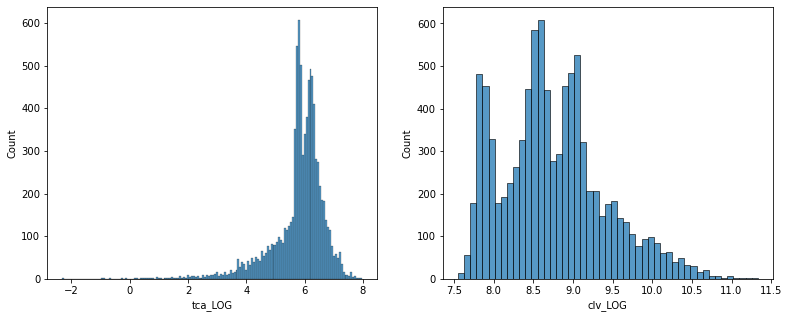

In [20]:
# Plotting data after log transformation
fig, ax = plt.subplots(1,2, figsize = (13,5))
sns.histplot(numerical['tca_LOG'], ax = ax[0])
sns.histplot(numerical['clv_LOG'], ax = ax[1])   
plt.show()

In [21]:
# Now let's check how many outliers our columns have

In [22]:
iqr_tca_log = np.nanpercentile(numerical['tca_LOG'],75) - np.nanpercentile(numerical['tca_LOG'],25)
upper_limit = np.nanpercentile(numerical['tca_LOG'],75) + 1.5*iqr_tca_log
lower_limit = np.nanpercentile(numerical['tca_LOG'],25) - 1.5*iqr_tca_log
tca_outliers_log = numerical[(numerical['tca_LOG'] >= upper_limit) | (numerical['tca_LOG'] <= lower_limit)]
print('Number of outliers of tca_log:', 
      len(tca_outliers_log))
print('% Outliers:', 
      (len(tca_outliers_log) / customer_df.shape[0])*100)

Number of outliers of tca_log: 901
% Outliers: 9.864243485876942


In [23]:
iqr_clv_log = np.nanpercentile(numerical['clv_LOG'],75) - np.nanpercentile(numerical['clv_LOG'],25)
upper_limit_tcalog = np.nanpercentile(numerical['clv_LOG'],75) + 1.5*iqr_tca_log
lower_limit_tcalog = np.nanpercentile(numerical['clv_LOG'],25) - 1.5*iqr_tca_log
clv_outliers_log = numerical[(numerical['clv_LOG'] >= upper_limit_tcalog) | (numerical['clv_LOG'] <= lower_limit_tcalog)
                            ]
print('Number of outliers of clv_LOG:', len(clv_outliers_log))
print('% Outliers:', (len(clv_outliers_log) / customer_df.shape[0])*100)

Number of outliers of clv_LOG: 304
% Outliers: 3.328224217210422


As the number of CLV outliers decreased, the number of TCA outliers increased. Let's go one step back and drop them. 

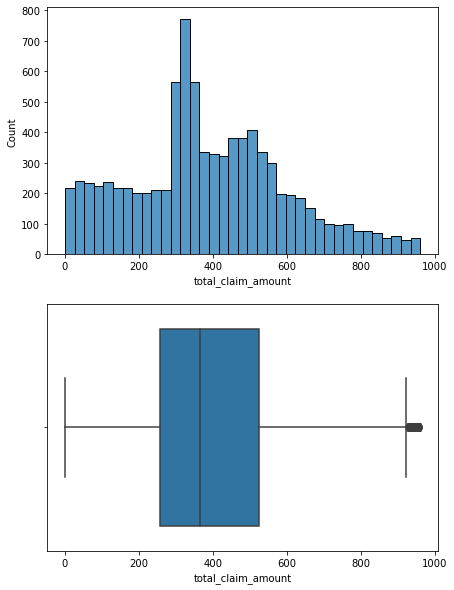

In [24]:
tca_outliers_dropped = numerical[numerical['total_claim_amount'] <= upper_limit_tca].copy()
fig, ax = plt.subplots(2, figsize = (7,10))
sns.histplot(x = tca_outliers_dropped['total_claim_amount'], ax = ax[0])
sns.boxplot(x = tca_outliers_dropped['total_claim_amount'], ax = ax[1])

plt.show()

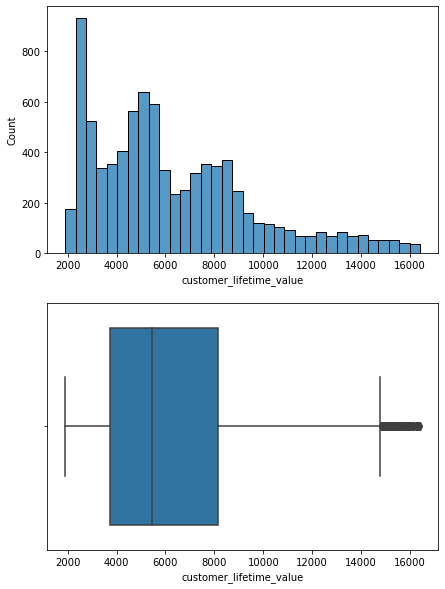

In [25]:
clv_outliers_dropped = numerical[numerical['customer_lifetime_value'] <= upper_limit_clv].copy()
fig, ax = plt.subplots(2, figsize = (7,10))
sns.histplot(x = clv_outliers_dropped['customer_lifetime_value'], ax = ax[0])
sns.boxplot(x = clv_outliers_dropped['customer_lifetime_value'], ax = ax[1])

plt.show()

There are still some extreme values on both columns, but the number of outliers has decreased substantially. 